# Problem Statement for the Advertising data
* The dateset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time.
 For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness 
 of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that
correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an 
added expenditure.
The dateset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these 
months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars. 
You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month.
You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can
help the organization to decide upon the right channels and amount of investments to be done on each media channel. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Advertising.csv" ,index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
print(data.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

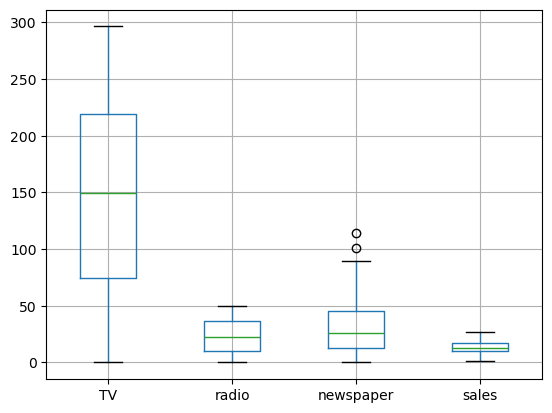

In [6]:
data.boxplot()

In [7]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Pre Assumptions

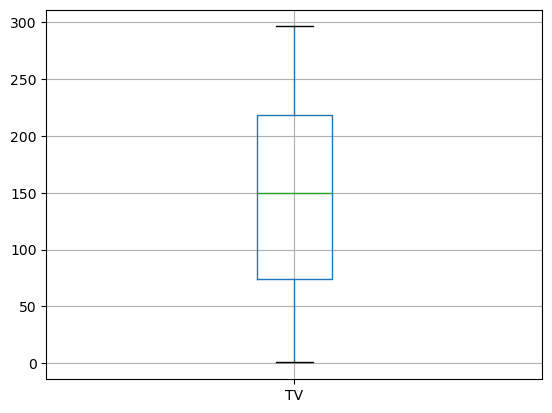

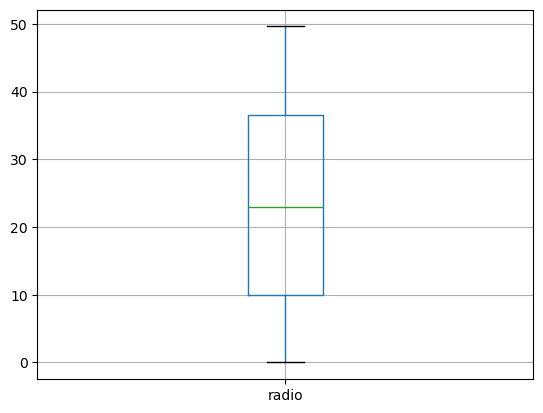

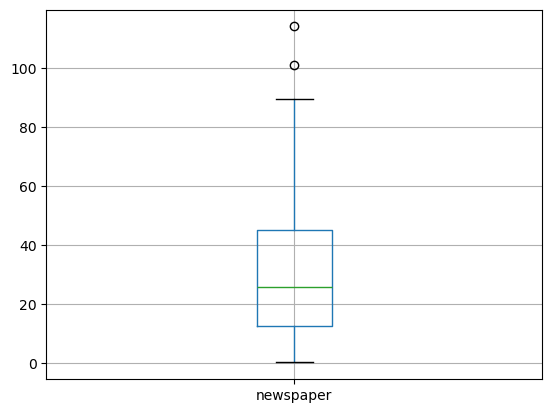

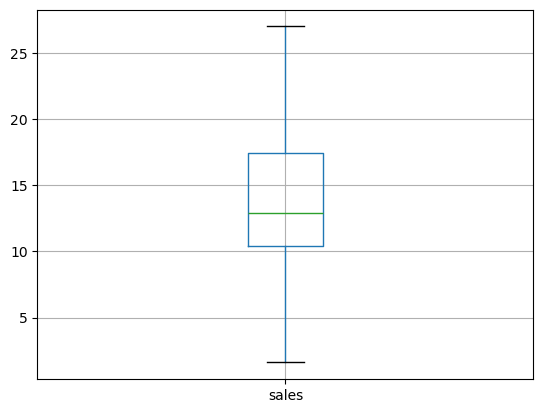

In [8]:
#Assumption 1: There should be no outliers in data
#check using boxplot,
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [9]:
# We are keeping outliers because they are relevant to the data. We should have domain knowledge.

In [10]:
data[data ["newspaper"]>90]

,TV,radio,newspaper,sales
17,67.8,36.6,114.0,12.5
102,296.4,36.3,100.9,23.8


In [11]:
df=data[data ["newspaper"]<90]
#to drop outliers

In [12]:
#data.drop(data[data["newspaper"]>90].index)

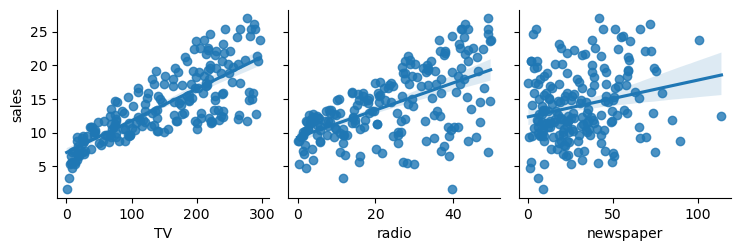

In [13]:
# Assumption 2: Assumption of linearity : every ind var should have a linear relationship with the dep var.
sns.pairplot(data,x_vars=['TV','radio','newspaper'],
             y_vars=['sales'],kind='reg')
plt.show()

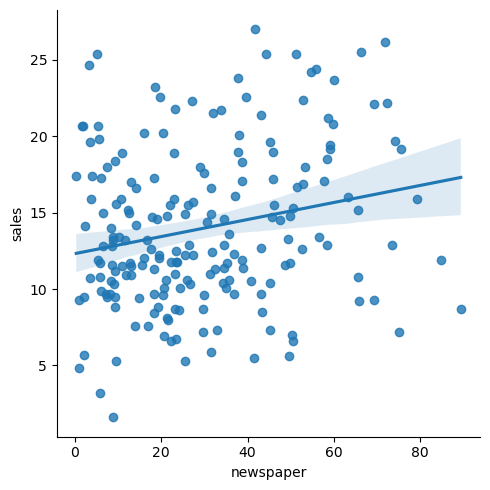

In [14]:
sns.lmplot(data=df,x='newspaper',y='sales')
plt.show();

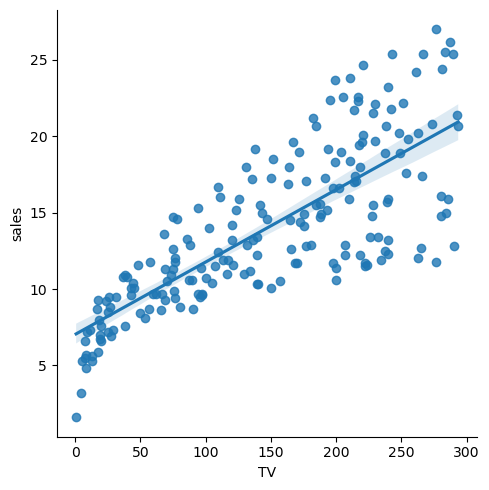

In [15]:
sns.lmplot(data=df,x='TV',y='sales')
plt.show();

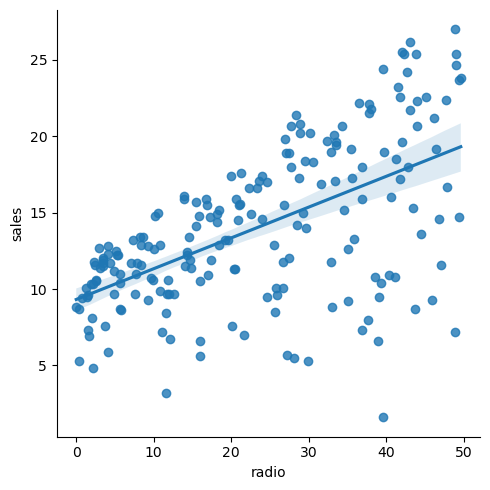

In [16]:
sns.lmplot(data=df,x='radio',y='sales')
plt.show();

In [17]:
#data.drop(["newspaper"],axis=1,inplace=True)

In [18]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
x=data.loc[:,['TV','radio','newspaper']]
y=data.loc[:,'sales']
#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

In [20]:
y.shape

(200,)

In [21]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


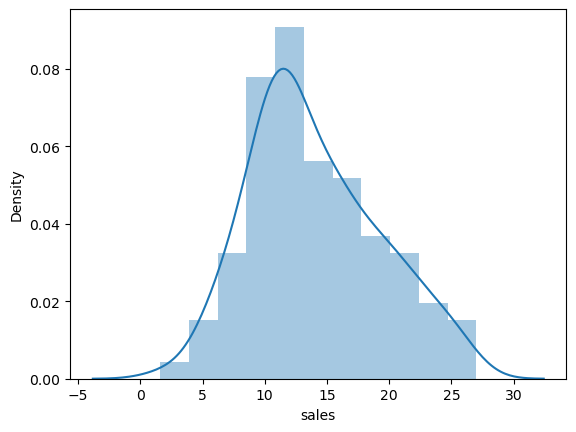

In [22]:
sns.distplot(y)
plt.show()

In [23]:
from scipy.stats import skew
skew(y)

np.float64(0.4045082487061191)

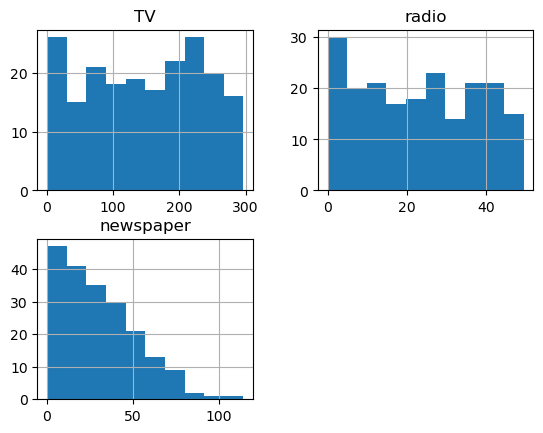

In [24]:
x.hist(bins=10)
plt.show()

In [25]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
 
#import numpy as np
#apply log + 1 transformation for all numeric features with skewness over .75
#X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#X["newspaper"] = np.log1p(X["newspaper"])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [26]:
np.log1p(0)

np.float64(0.0)

In [27]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [28]:
#x[data_num_skewed.index]

In [29]:
#x[data_num_skewed.index],max()

In [30]:
#x[data_num_skewed.index],min()

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


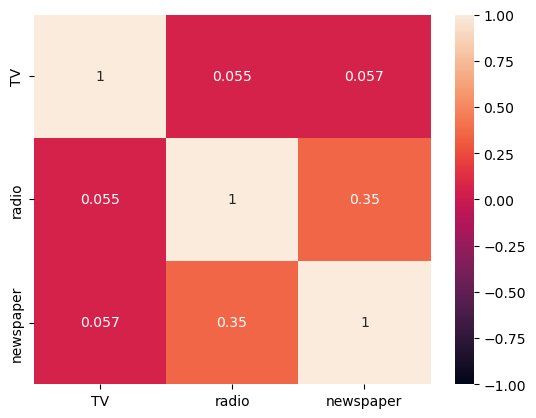

In [31]:
#Assumption 4: of no Multicollinearity: There should be no Multicollinearity between the independent varibales.
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=x.corr(method='pearson')
print(corr_df)


sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

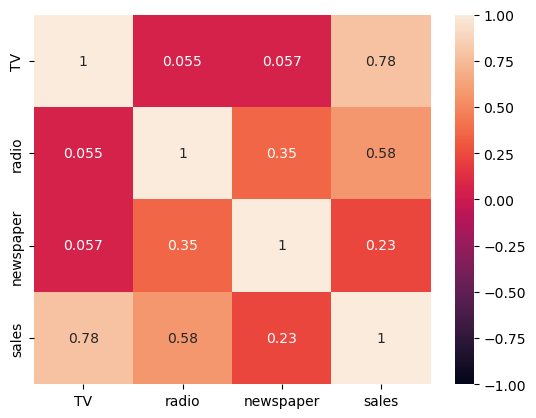

In [32]:
sns.heatmap(data.corr(method="pearson"),vmax=1.0,vmin=-1.0,annot=True)
plt.show()

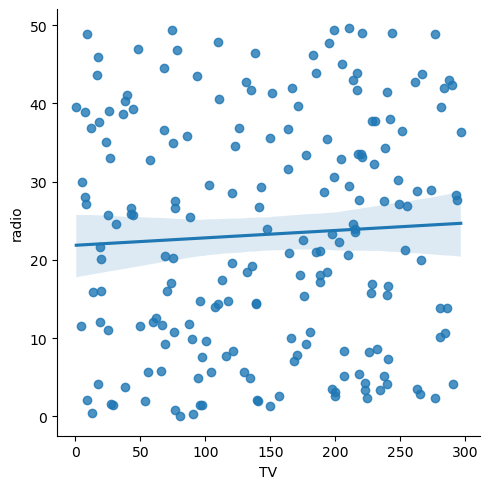

In [33]:
sns.lmplot(data,x="TV",y="radio")
plt.show()

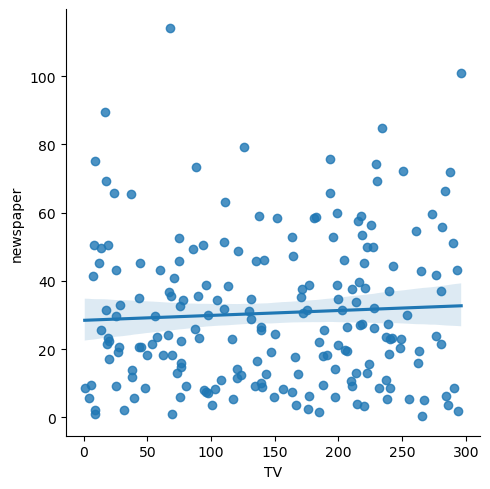

In [34]:
sns.lmplot(data,x="TV",y="newspaper")
plt.show()

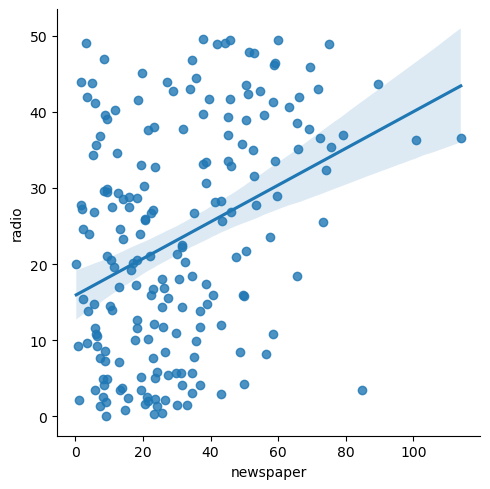

In [38]:
sns.lmplot(data,x="newspaper",y="radio")
plt.show()

In [77]:
for i in range(x.shape[1]):
    print(vif(x.values,i))
    

2.486771835198193
3.285462100162896
3.0552445106573844


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"]=x.columns
vif_df["VIF  Factor"]=[vif(x.values,i) for i in range (x.shape[1])]
vif_df


,features,VIF Factor
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [42]:
#1000-->test size =0.3
#1000-->data slit(70%-30%)

In [43]:
from sklearn.model_selection import train_test_split
#split the data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)
print("Percent of train data ",x_train.shape[0]/x.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40, 3)
Percent of train data  80.0


In [45]:
from sklearn.linear_model import LinearRegression
# Create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train,y_train)
#print intercept and coefficients 
print(lm.intercept_)
print(lm.coef_)

3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]


In [46]:
# pair the feature names with the coefficients
print(list(zip(x.columns,lm.coef_)))

[('TV', np.float64(0.04377260306304603)), ('radio', np.float64(0.19343298611600773)), ('newspaper', np.float64(-0.0022287928056053644))]


In [47]:
x1=100 #tv
x2=200 #radio
x3=0 #newspaper
y_pred=3.2540971144188813+(0.0437726*x1)+(0.19343299*x2)+(-0.00222879*x3)
print(y_pred)

46.31795511441888


In [48]:
x_test.shape

(40, 3)

In [49]:
y_pred=lm.predict(x_test)
y_pred

array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [50]:
new_df=pd.DataFrame()
new_df=x_test.copy()

new_df["Actual sales"]=y_test
new_df["Predicted sales"]= y_pred
new_df=new_df.reset_index().drop("index",axis=1)

In [53]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,9.3,18.4,18.162530
1,8.7,48.9,75.0,7.2,12.926632
2,218.4,27.7,53.4,18.0,18.053110
3,283.6,42.0,66.2,25.5,23.644647
4,216.4,41.7,39.6,22.6,20.704384
5,147.3,23.9,19.1,14.6,14.282280
6,188.4,18.1,25.6,14.9,14.944935
7,198.9,49.4,60.0,23.7,21.382330
8,216.8,43.9,27.2,22.3,21.175082
9,17.2,45.9,69.3,9.3,12.731105


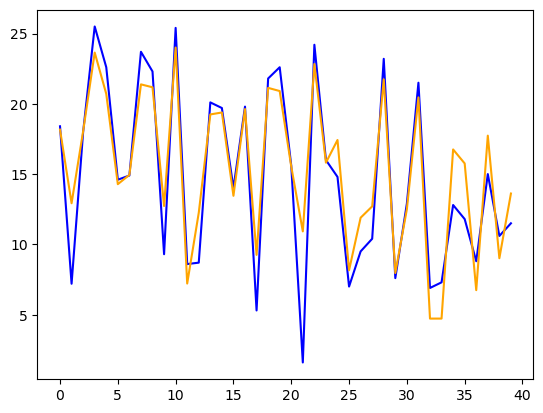

In [55]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

In [57]:
print(lm.score(x_train,y_train))

0.9209087553499528


In [58]:
print(len(y_test))
print(len(y_pred))

40
40


In [59]:
import sklearn
sklearn.metrics.mean_squared_error(y_test,y_pred)

6.700486756528875

In [63]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
 
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8353672324670594
MSE: 6.700486756528875
MAE: 1.885013031042315
RMSE: 2.58852984462781
Adj R-square: 0.8328473431680857


In [64]:
print(y_test.min())
print(y_test.max())


1.6
25.5


In [65]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,9.3,18.4,18.162530
1,8.7,48.9,75.0,7.2,12.926632
2,218.4,27.7,53.4,18.0,18.053110
3,283.6,42.0,66.2,25.5,23.644647
4,216.4,41.7,39.6,22.6,20.704384
5,147.3,23.9,19.1,14.6,14.282280
6,188.4,18.1,25.6,14.9,14.944935
7,198.9,49.4,60.0,23.7,21.382330
8,216.8,43.9,27.2,22.3,21.175082
9,17.2,45.9,69.3,9.3,12.731105


In [66]:
import os 
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\ML'

In [68]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,9.3,18.4,18.162530,0.237470
1,8.7,48.9,75.0,7.2,12.926632,-5.726632
2,218.4,27.7,53.4,18.0,18.053110,-0.053110
3,283.6,42.0,66.2,25.5,23.644647,1.855353
4,216.4,41.7,39.6,22.6,20.704384,1.895616
5,147.3,23.9,19.1,14.6,14.282280,0.317720
6,188.4,18.1,25.6,14.9,14.944935,-0.044935
7,198.9,49.4,60.0,23.7,21.382330,2.317670
8,216.8,43.9,27.2,22.3,21.175082,1.124918
9,17.2,45.9,69.3,9.3,12.731105,-3.431105


# Testing Phase--> Unseen Data

In [74]:
invest =pd.DataFrame({"TV":[100,25,200,30,2],
                      "radio":[200,100,50,120,30],
                      "newspaper":[0,1,1.5,2,0]})
invest

,TV,radio,newspaper
0,100,200,0.0
1,25,100,1.0
2,200,50,1.5
3,30,120,2.0
4,2,30,0.0


In [75]:
y_pred_inv = lm.predict(invest)
y_pred_inv

array([46.31795464, 23.68948201, 21.67692384, 27.77477595,  9.1446319 ])

In [76]:
invest["sales pred"]=y_pred_inv
invest

,TV,radio,newspaper,sales pred
0,100,200,0.0,46.317955
1,25,100,1.0,23.689482
2,200,50,1.5,21.676924
3,30,120,2.0,27.774776
4,2,30,0.0,9.144632


# Model Tunning / Optimization

In [78]:
from sklearn.model_selection import train_test_split
#split the data into test and train
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [79]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(x_train,y_train)

print(rid.intercept_)
print(rid.coef_)


3.254199650479162
[ 0.0437726   0.19342655 -0.00222742]


In [87]:
y_pred=rid.predict(x_test)


In [81]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)

print(las.intercept_)
print(las.coef_)


3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [85]:
y_pred=las.predict(x_test)


In [86]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
 
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
MSE: 6.672671295377451
MAE: 1.905696067365571
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [ ]:
#OLS-->OLS(y_train,x_train) #sklearn
#ols-->ols(y-x1+x2+x3) #statsmodel


In [ ]:
#fits(x_train,y_train)-->sklearn
#y~x1+x2+x3,data=df-->statsmodels

In [90]:
new_df=pd.DataFrame()
new_df=x_train.copy()

new_df["sales"]=y_train.copy()
new_df

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
8,120.2,19.6,11.6,13.2
27,142.9,29.3,12.6,15.0
139,43.0,25.9,20.5,9.6
59,210.8,49.6,37.7,23.8
...,...,...,...,...
114,209.6,20.6,10.7,15.9
65,131.1,42.8,28.9,18.0
16,195.4,47.7,52.9,22.4
126,87.2,11.8,25.9,10.6


In [91]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper',
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.254097
TV           0.043773
radio        0.193433
newspaper   -0.002229
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.09e-85
Time:                        13:20:54   Log-Likelihood:                -276.62
No. Observations:                 160   AIC:                             561.2
Df Residuals:                     156   BIC:                             573.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [93]:
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)
 
mse = mean_squared_error(y_test,y_pred_new)
print("MSE:",mse)
 
mae = mean_absolute_error(y_test,y_pred_new)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8353672324670594
MSE: 6.700486756528873
MAE: 1.8850130310423086
RMSE: 2.5885298446278098
Adj R-square: 0.8328473431680857


In [92]:
y_pred_new=lm_model.predict(x_test)

In [94]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio ',
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           3.47e-87
Time:                        13:33:43   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [95]:
y_pred_new=lm_model.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)
 
mse = mean_squared_error(y_test,y_pred_new)
print("MSE:",mse)
 
mae = mean_absolute_error(y_test,y_pred_new)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
MSE: 6.697131733243967
MAE: 1.8889112959614192
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


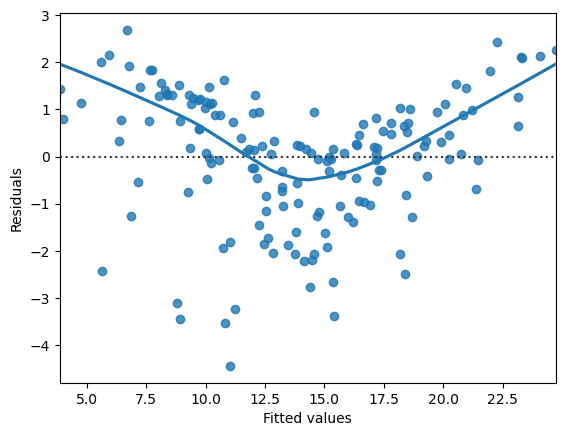

In [96]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

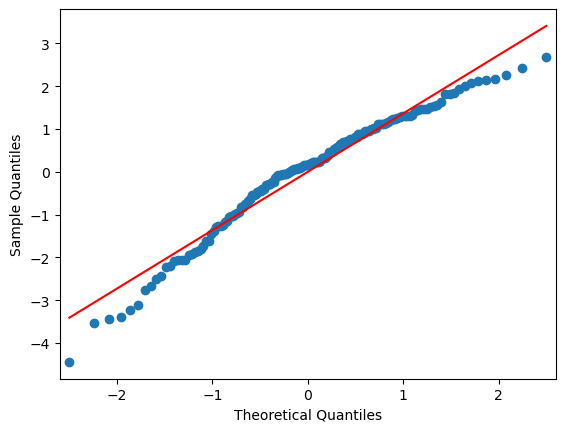

In [97]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

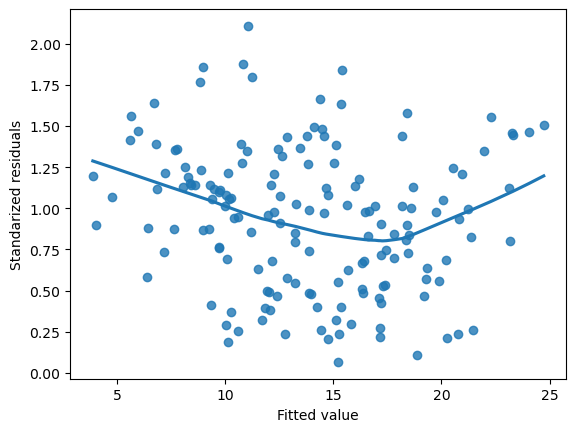

In [98]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()